# Introduction

-The objective of this project is to explore and analyze the relationship between the number of employees and the net income of Nokia, a renowned technology company. By examining Nokia's financial data over a specific period, we aim to understand how changes in the workforce impact the company's financial performance.


-Nokia, with its rich history and global presence, has witnessed fluctuations in its net income over time. While net income is influenced by various factors, such as market dynamics, competition, and technological advancements, the focus of this project is to specifically investigate the effect of the number of employees on net income.


-By leveraging the power of Python and utilizing libraries such as Pandas, NumPy, Matplotlib, Seaborn we will perform a comprehensive analysis of Nokia's financial data. We will import the necessary libraries, load the data into a Pandas DataFrame, and conduct exploratory data analysis to gain insights into the trends and patterns present.

# Step 0: Importing Libraries and reading the data

I started by importing the necessary libraries: Pandas, Numpy, Matplotlib.

Some other libraries would be imported further.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Nokia_Dataset.csv')

# Step 1: Data Understanding

In [3]:
df.shape

(23, 4)

We have 23 rows and 4 columns in our dataset.

In [4]:
df.columns

Index(['Year', 'Number of Employees', 'Net Sales in Euro',
       'Net Income in Euro'],
      dtype='object')

We have collected some info on our column names or 'features'.

Now, we want to check for the data types each of those features have.

In case we have some errors, we could easily fix them before getting started.

In [5]:
df.dtypes

Year                     int64
Number of Employees    float64
Net Sales in Euro        int64
Net Income in Euro     float64
dtype: object

At this point, we have not found any errors with data types, so we can start to gather some statistical data or other useful info about our dataset.

In [6]:
df.describe()

,Year,Number of Employees,Net Sales in Euro,Net Income in Euro
count,23.00000,17.000000,2.300000e+01,1.600000e+01
mean,2010.00000,94368.823529,2.927391e+10,9.926875e+08
std,6.78233,26630.952359,1.110167e+10,2.777606e+09
min,1999.00000,55400.000000,1.176000e+10,-3.105000e+09
25%,2004.50000,68480.000000,2.238000e+10,-8.655000e+08
50%,2010.00000,98320.000000,2.953000e+10,4.490000e+08
75%,2015.50000,112260.000000,3.642500e+10,2.715000e+09
max,2021.00000,132430.000000,5.106000e+10,7.205000e+09


In [7]:
df.head()

,Year,Number of Employees,Net Sales in Euro,Net Income in Euro
0,2021,87900.0,22200000000,1.623000e+09
1,2020,92040.0,21850000000,-2.431000e+09
2,2019,98320.0,23320000000,7.000000e+06
3,2018,103080.0,22560000000,-3.400000e+08
4,2017,102760.0,23150000000,-1.494000e+09


# Step 2: Data Preparation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 23 non-null     int64  
 1   Number of Employees  17 non-null     float64
 2   Net Sales in Euro    23 non-null     int64  
 3   Net Income in Euro   16 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 864.0 bytes


At this stage, we can see that we have some missing values.

In [9]:
df.isna().sum()

Year                   0
Number of Employees    6
Net Sales in Euro      0
Net Income in Euro     7
dtype: int64

Let's fix this and drop these values.

In [10]:
df.dropna()

,Year,Number of Employees,Net Sales in Euro,Net Income in Euro
0,2021,87900.0,22200000000,1.623000e+09
1,2020,92040.0,21850000000,-2.431000e+09
2,2019,98320.0,23320000000,7.000000e+06
3,2018,103080.0,22560000000,-3.400000e+08
4,2017,102760.0,23150000000,-1.494000e+09
5,2016,100880.0,23640000000,-7.660000e+08
6,2015,55720.0,12500000000,2.466000e+09
7,2014,55400.0,11760000000,3.462000e+09
8,2013,58900.0,12710000000,-6.150000e+08
9,2012,97800.0,30180000000,-3.105000e+09


Of course, there are some other approaches of doing this, but I prefer simple one.

We can also fill these empty values, but let's stick with dropping method.

In [11]:
print(df.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
dtype: bool


Checking for possible duplicates.

Luckily, there aren't any duplicated so we can start to make some visuals.

# Step 3: Feature Understanding

I prefer to start by looking for some relationships between features and understanding them.

Let's start with looking at company's net sales every year.

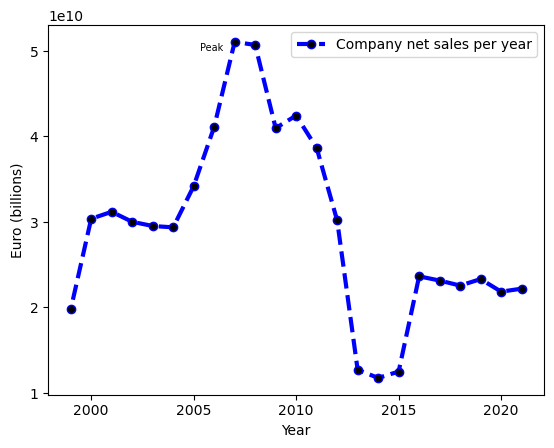

In [15]:
#plt.figure(figsize=(10,6))
plt.plot(df["Year"],df["Net Sales in Euro"], marker = 'o', linestyle = '--', color = 'blue', markerfacecolor='black', linewidth = 3)
plt.xlabel("Year")
plt.ylabel("Euro (billions)")
plt.xticks(range(2000,2022,5))
plt.yticks(range(10000000000, 60000000000, 10000000000))
plt.legend(['Company net sales per year'], loc = 'upper right')
plt.text(2005.3, 5000*1e7, 'Peak', fontsize = 7)
plt.show()

We can observe from the graph that NOKIA's net sales were not stable over the whole period with some ups and downs.

We want to find some reason for this phenomena.

Since we have only 3 features, I suppose that number of employees might be one of the reasons for this sharp drop.

Before we make next step, I want to visualize net income first.

Text(2018, 4000000000.0, 'Profit Area')

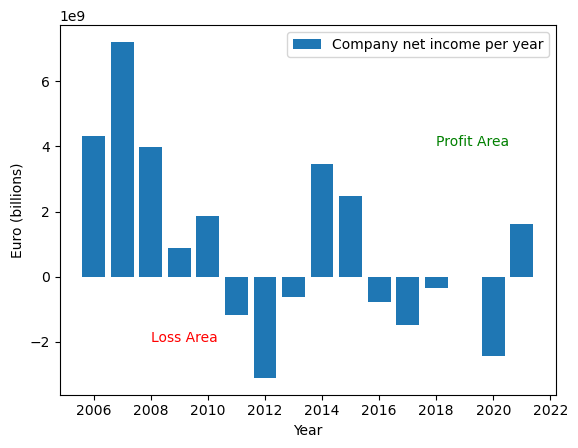

In [16]:
plt.bar(df['Year'], df['Net Income in Euro'])
plt.legend(['Company net income per year'])
plt.xlabel("Year")
plt.ylabel("Euro (billions)")
plt.text(2008, -2000*1e6, 'Loss Area', color = 'red')
plt.text(2018, 4000*1e6, 'Profit Area', color = 'green')

What we can observe from this bar plot is that company have lost some of its money during some specific periods.

At this point, we can find out if number of employees directly affect net income of company or not.

# Step 4: Feature Relationships

Let's start by simply looking at correlations between features.

In [17]:
df.corr()

,Year,Number of Employees,Net Sales in Euro,Net Income in Euro
Year,1.000000,-0.078590,-0.393868,-0.557094
Number of Employees,-0.078590,1.000000,0.656492,-0.076023
Net Sales in Euro,-0.393868,0.656492,1.000000,0.446527
Net Income in Euro,-0.557094,-0.076023,0.446527,1.000000


From this table, we can observe that number of employees and net sales have strong possitive correlation, which means they are highly related to each other. If one increases, the other will do as well. Conversely, if one decreases, the other will decrease too.

So let's try to visualize their relationship and make some conclusions.

([<matplotlib.axis.XTick at 0x1fcdc4cf3d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

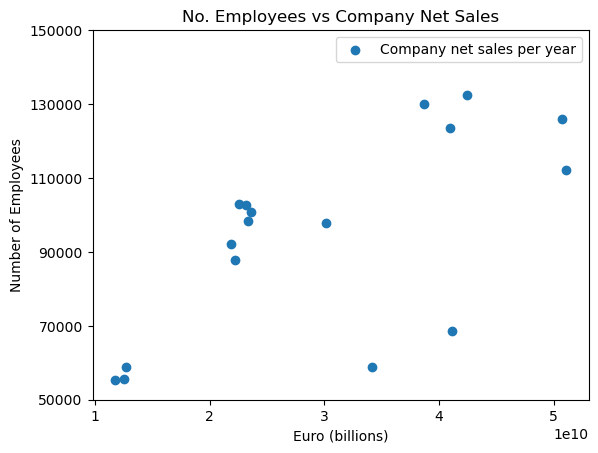

In [20]:
plt.scatter(df['Net Sales in Euro'], df['Number of Employees'])
plt.legend(['Company net sales per year'])
plt.title('No. Employees vs Company Net Sales')
plt.ylabel('Number of Employees')
plt.xlabel('Euro (billions)')
plt.ylim([50000,150000])
plt.yticks(range(50000,160000,20000))
plt.xticks(range(10000000000, 60000000000, 10000000000))

As I said earlier, two features have strong positive relationship between each other. At this point, we can conclude that number of employees can have potential impact on company's net income.

This is additional visualization with linear regression done by importing seaborn library

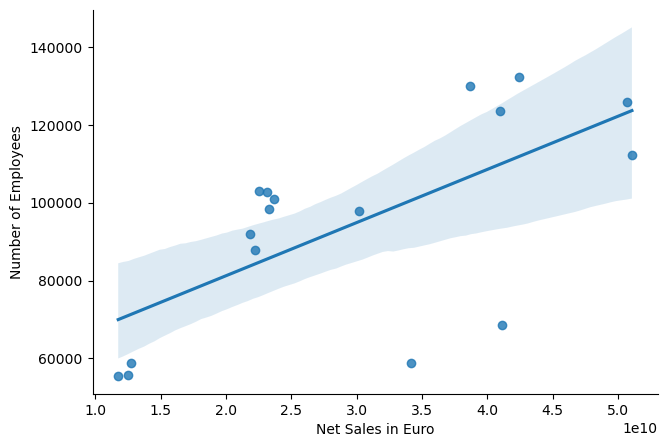

In [19]:
import seaborn as sns
sns.pairplot(df, x_vars=['Net Sales in Euro'], y_vars = ['Number of Employees'], height = 4.5, aspect = 1.5, kind = 'reg')

# Conclusion

-Based on the analysis of Nokia's financial data, it can be concluded that the number of employees has a significant impact on the company's net income each year. By examining the trends and patterns in the data, it is evident that variations in the number of employees directly influence the financial performance of the company.


-Throughout the analyzed period, it is observed that as the number of employees increases, there is a corresponding effect on the net income. This relationship suggests that a larger workforce contributes to increased productivity and profitability for Nokia. It is important to note that other factors, such as market conditions and company strategies, may also influence net income, but the analysis highlights the significant role played by the number of employees.


-The positive correlation between the number of employees and net income implies that Nokia's management should carefully consider workforce planning and optimization strategies. Scaling the number of employees in line with business demands and market conditions can help ensure efficient resource allocation and maximize profitability. Conversely, inadequate staffing levels may hinder the company's ability to meet demand or optimize operations, potentially impacting net income negatively.


-To further validate and strengthen this conclusion, additional analyses such as regression modeling or hypothesis testing can be conducted. These statistical techniques can provide more precise insights into the relationship between the number of employees and net income, accounting for other potential influencing factors.


(This dataset is freely available on kaggle.com)